# Stock Price Regression Project

## Project Overview
This project focuses on developing a predictive regression model to estimate stock prices using historical stock market data from the NSE (National Stock Exchange) for the years 2007 to 2012. The goal is to leverage machine learning techniques to predict future stock prices based on historical patterns and trends.

---

## Objectives
1. **Data Preparation**
   - Clean and preprocess the datasets for consistency and usability.
   - Handle missing data and outliers.
   - Standardize and normalize features as needed.

2. **Exploratory Data Analysis (EDA)**
   - Analyze data distributions and trends over time.
   - Identify correlations and relationships between features.
   - Visualize key insights.

3. **Feature Engineering**
   - Create new predictive features from the data (e.g., moving averages, price change trends).
   - Select relevant features for the regression model.

4. **Model Development**
   - Split the data into training and testing sets.
   - Implement multiple regression algorithms (e.g., Linear Regression, Random Forest, Gradient Boosting).
   - Tune hyperparameters for optimal performance.

5. **Model Evaluation**
   - Evaluate model performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
   - Compare models to determine the best-performing approach.

6. **Deployment and Reporting**
   - Package the final model for deployment.
   - Present findings and insights through visualizations and a detailed report.

---

## Workflow
### 1. Data Preparation
- Merge datasets from 2007 to 2012.
- Clean data by addressing missing values and outliers.
- Convert necessary columns to numeric types.

### 2. Exploratory Data Analysis
- Analyze stock performance trends over time.
- Examine correlations between features (e.g., trading volume and stock prices).
- Visualize distributions and detect anomalies.

### 3. Feature Engineering
- Generate lagged features, moving averages, or volatility measures.
- Normalize or scale features for regression models.

### 4. Model Development
- Train-test split (e.g., 80-20 or time-based split).
- Build baseline regression models and evaluate performance.
- Experiment with advanced algorithms and fine-tune.

### 5. Model Evaluation
- Use evaluation metrics to compare models.
- Plot predictions vs. actual values for validation.
- Identify key factors influencing stock price predictions.
---

## Tools and Technologies
- **Data Handling**: Python (Pandas, NumPy)
- **Visualization**: Matplotlib, Seaborn
- **Modeling**: Scikit-learn, XGBoost

---

## Deliverables
1. Cleaned and preprocessed datasets.
2. Feature-engineered dataset ready for modeling.
3. Trained regression models with evaluation results.
4. Final model packaged for deployment.
5. Comprehensive project report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

### Data Preparation
   - Clean and preprocess the datasets for consistency and usability.
   - Handle missing data and outliers.
   - Standardize and normalize features as needed.

In [2]:
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

path = os.path.join(current_dir, "data")
print(f"Full path: {path}")
print(f"Full path: {path}")
if not os.path.isdir(path):
    raise FileNotFoundError(f"The directory '{path}' does not exist.")

csv_pattern_lower = os.path.join(path, "NSE_data_all_stocks_*.csv")
csv_files = glob.glob(csv_pattern_lower)

df_list = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df_list.append(df)
        print(f"Successfully read: {file} with {len(df)} rows.")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Check if any DataFrames were successfully read
if not df_list:
    raise ValueError("No DataFrames were loaded. Please check the CSV files for readability.")

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True, sort=False)

# Create a new directory for combined output
combined_output_dir = os.path.join(current_dir, "Combined_NSE_Data")
if not os.path.exists(combined_output_dir):
    os.makedirs(combined_output_dir)
    print(f"Created new directory: {combined_output_dir}")

output_file = os.path.join(combined_output_dir, "NSE_data_all_stocks_2007_2012_combined.csv")
combined_df.to_csv(output_file, index=False)

print(f"All CSV files have been successfully combined into '{output_file}'.")

Current working directory: /home/gitongah/Documents/4.1/Knowledge Based System/CAT/NSE
Full path: /home/gitongah/Documents/4.1/Knowledge Based System/CAT/NSE/data
Full path: /home/gitongah/Documents/4.1/Knowledge Based System/CAT/NSE/data
Successfully read: /home/gitongah/Documents/4.1/Knowledge Based System/CAT/NSE/data/NSE_data_all_stocks_2008.csv with 10583 rows.
Successfully read: /home/gitongah/Documents/4.1/Knowledge Based System/CAT/NSE/data/NSE_data_all_stocks_2012.csv with 16044 rows.
Successfully read: /home/gitongah/Documents/4.1/Knowledge Based System/CAT/NSE/data/NSE_data_all_stocks_2011.csv with 14931 rows.
Successfully read: /home/gitongah/Documents/4.1/Knowledge Based System/CAT/NSE/data/NSE_data_all_stocks_2007.csv with 10608 rows.
Successfully read: /home/gitongah/Documents/4.1/Knowledge Based System/CAT/NSE/data/NSE_data_all_stocks_2010.csv with 14952 rows.
Successfully read: /home/gitongah/Documents/4.1/Knowledge Based System/CAT/NSE/data/NSE_data_all_stocks_2009.cs

In [3]:
data = pd.read_csv(output_file)
data

/tmp/ipykernel_381013/1584776222.py:1: DtypeWarning: Columns (0,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output_file)


,Date,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted,DATE,Adjust
0,1/2/2008,^N20I,NSE 20-Share Index,"3,396.83","5,030.91","5,167.18","5,167.18","5,167.18","5,444.83",-277.65,5.37%,"4,790,000",-,NaN,NaN
1,1/2/2008,ACCS,AccessKenya Group,3.9,10.1,21,25,21.25,23.25,-2,9.41%,"538,100",-,NaN,NaN
2,1/2/2008,UNGA,Unga Group,9.6,16.5,15,15,15,15.45,-0.45,3.00%,"25,000",12.5,NaN,NaN
3,1/2/2008,MSC,Mumias Sugar,4,7.35,13.35,14.2,13.6,14.8,-1.2,8.82%,"617,200",-,NaN,NaN
4,1/2/2008,EVRD,Eveready East Africa,1.4,3,7.2,8,7.7,7.95,-0.25,3.25%,"23,900",-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81499,NaN,REA,Rea Vipingo Plantations,14.5,23.5,11.5,11.5,11.5,11.25,0.25,2.17%,200,NaN,12/31/2009,-
81500,NaN,LIMT,Limuru Tea,400,500,305,305,305,305,-,-,0,NaN,12/31/2009,-
81501,NaN,KUKZ,Kakuzi,67.5,89,31.75,31.75,31.75,31.75,-,-,0,NaN,12/31/2009,-
81502,NaN,KAPC,Kapchorua Tea,111,148,86,86,86,86,-,-,0,NaN,12/31/2009,-


In [4]:
# Display the shape of the merged dataset
data.shape

(81504, 15)

In [5]:
# Display Unique values for each column
unique_values = {column: data[column].unique() for column in data.columns}
unique_values['NAME']

array(['NSE 20-Share Index', 'AccessKenya Group', 'Unga Group',
       'Mumias Sugar', 'Eveready East Africa', 'East African Breweries',
       'British American Tobacco Kenya', 'Olympia Capital Holdings',
       'Centum Investment', 'Kenya Re-Insurance Corporation',
       'Jubilee Holdings', 'Total Kenya', 'Kenya Power and Lighting',
       'KenolKobil', 'KenGen', 'E.A.Cables', 'Bamburi Cement',
       'Athi River Mining', 'Express', 'TPS Eastern Africa (Serena)',
       'ScanGroup', 'Nation Media Group', 'Kenya Airways',
       'Standard Chartered Bank', 'NIC Bank', 'National Bank of Kenya',
       'Kenya Commercial Bank', 'Housing Finance', 'Equity Bank',
       'Diamond Trust Bank Kenya', 'CFC Stanbic Holdings',
       'Barclays Bank', 'CMC Holdings', 'Sasini Tea and Coffee',
       'Rea Vipingo Plantations', 'Standard Group', 'Crown Berger',
       'Sameer Africa', 'Car and General (K)', 'Williamson Tea Kenya',
       'Unilever Tea Kenya', 'Kakuzi', 'City Trust',
       'Pan Afri

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81504 entries, 0 to 81503
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       10583 non-null  object
 1   CODE       81504 non-null  object
 2   NAME       81456 non-null  object
 3   12m Low    81504 non-null  object
 4   12m High   81504 non-null  object
 5   Day Low    81504 non-null  object
 6   Day High   81504 non-null  object
 7   Day Price  81504 non-null  object
 8   Previous   81504 non-null  object
 9   Change     81504 non-null  object
 10  Change%    81504 non-null  object
 11  Volume     81504 non-null  object
 12  Adjusted   10583 non-null  object
 13  DATE       70921 non-null  object
 14  Adjust     70921 non-null  object
dtypes: object(15)
memory usage: 9.3+ MB


In [7]:
# Investigate rows containing '-' in each column
columns_with_dash = [column for column in data.columns if '-' in data[column].values]
dash_rows = {column: data[data[column] == '-'] for column in columns_with_dash}
for column, data in dash_rows.items():
    # Let's print the count
    print(f'Column: {column}, Count of rows: {len(data)}')


Column: Previous, Count of rows: 12
Column: Change, Count of rows: 30363
Column: Change%, Count of rows: 30373
Column: Adjusted, Count of rows: 6262
Column: Adjust, Count of rows: 54733


#### Data Cleaning Steps
1. **Step 1: Replace '-' with np.nan**
    - To ensure missing values are handled appropriately, replace all occurrences of '-' with np.nan across the dataset.

2. **Step 2: Drop the 'Adjust' Column**
    - The 'Adjust' column contains too many missing values (60k out of 80k rows), making it unreliable for analysis. Drop this column.

3. **Step 3: Handle Missing Values in 'Previous'**
    - Use forward-fill (method='ffill') to propagate the last valid observation forward to fill missing values in 'Previous'.

4. **Step 4: Recalculate 'Change' and 'Change%'**
    - Since 'Change' and 'Change%' columns have many missing values, we will recalculate them based on 'Day_Price' and 'Previous'.

5. **Step 5: Verify the Dataset**
    - Check for any remaining missing values in critical columns and ensure the dataset's integrity.


In [8]:
# Replace ',' with '' in all columns to handle thousands separators
stocks_data = data.replace(',', '', regex=True)

# Convert columns to numeric where applicable
# This step is critical if some columns need to remain as strings
numeric_columns = ['12m Low', '12m High', 'Day Low', 'Day High',
                    'Day Price', 'Previous', 'Change', 'Change%', 'Volume']

# Apply numeric conversion to these columns
for col in numeric_columns:
    stocks_data[col] = pd.to_numeric(stocks_data[col], errors='coerce')



/tmp/ipykernel_381013/2286296046.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stocks_data = data.replace(',', '', regex=True)


In [9]:
stocks_data

,Date,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted,DATE,Adjust
10583,NaN,^NASI,NSE All-Share Index,73.23,119.37,68.38,68.38,68.38,68.03,0.35,NaN,10990000,NaN,1/3/2012,-
10584,NaN,^N20I,NSE 20-Share Index,3312.56,4985.91,3212.86,3212.86,3212.86,3205.02,7.84,NaN,10990000,NaN,1/3/2012,-
10585,NaN,KPLC-P7,Kenya Power and Lighting 7%,5.50,5.50,5.50,5.50,5.50,5.50,NaN,NaN,0,NaN,1/3/2012,-
10586,NaN,KPLC-P4,Kenya Power and Lighting 4%,7.65,7.65,7.65,7.65,7.65,7.65,NaN,NaN,0,NaN,1/3/2012,-
10587,NaN,SCOM,Safaricom,3.05,6.50,2.90,3.00,2.95,2.95,NaN,NaN,7410000,NaN,1/3/2012,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81499,NaN,REA,Rea Vipingo Plantations,14.50,23.50,11.50,11.50,11.50,11.25,0.25,NaN,200,NaN,12/31/2009,-
81500,NaN,LIMT,Limuru Tea,400.00,500.00,305.00,305.00,305.00,305.00,NaN,NaN,0,NaN,12/31/2009,-
81501,NaN,KUKZ,Kakuzi,67.50,89.00,31.75,31.75,31.75,31.75,NaN,NaN,0,NaN,12/31/2009,-
81502,NaN,KAPC,Kapchorua Tea,111.00,148.00,86.00,86.00,86.00,86.00,NaN,NaN,0,NaN,12/31/2009,-


In [10]:
# Step 1: Replace '-' with np.nan
stocks_data = stocks_data.replace('-', np.nan)

# Step 2: Drop the 'Adjust' Column
stocks_data = stocks_data.drop(columns='Adjusted')

# Step 3: Handle Missing Values in 'Previous'
stocks_data['Previous'] = stocks_data['Previous'].fillna(method='ffill')

# Step 4: Recalculate 'Change' and 'Change%'
stocks_data['Day Price'] = pd.to_numeric(stocks_data['Day Price'], errors='coerce')
stocks_data['Previous'] = pd.to_numeric(stocks_data['Previous'], errors='coerce')
stocks_data['Change'] = stocks_data['Day Price'] - stocks_data['Previous']
stocks_data['Change%'] = (stocks_data['Change'] / stocks_data['Previous']) * 100



/tmp/ipykernel_381013/417607988.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stocks_data = stocks_data.replace('-', np.nan)
/tmp/ipykernel_381013/417607988.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data['Previous'] = stocks_data['Previous'].fillna(method='ffill')


In [11]:
# Investigate columns with missing values and their count
missing_values_count = stocks_data.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]
print(missing_values_count)

Date      54733
NAME         23
Adjust    54733
dtype: int64


In [12]:
# Check rows with missing Name values
missing_name_rows = stocks_data[stocks_data['NAME'].isnull()]
missing_name_rows

,Date,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,DATE,Adjust
48917,NaN,OCH-R,NaN,0.60,0.6,0.50,1.0,0.95,19.20,-18.25,-95.052083,253000,9/5/2007,NaN
48961,NaN,OCH-R,NaN,0.60,0.6,0.45,1.0,0.45,0.95,-0.50,-52.631579,511800,9/6/2007,NaN
49006,NaN,OCH-R,NaN,0.60,0.6,0.05,0.5,0.20,0.45,-0.25,-55.555556,404800,9/7/2007,NaN
49050,NaN,OCH-R,NaN,0.60,0.6,0.15,0.7,0.40,0.20,0.20,100.000000,272200,9/10/2007,NaN
49095,NaN,OCH-R,NaN,0.60,0.6,0.20,1.0,0.20,0.40,-0.20,-50.000000,5170000,9/11/2007,NaN
49141,NaN,OCH-R,NaN,0.60,0.6,0.25,1.0,0.55,0.20,0.35,175.000000,329000,9/12/2007,NaN
49185,NaN,OCH-R,NaN,0.60,0.6,0.10,1.0,0.40,0.55,-0.15,-27.272727,3040000,9/13/2007,NaN
49229,NaN,OCH-R,NaN,0.60,0.6,0.40,2.0,0.60,0.40,0.20,50.000000,3650000,9/14/2007,NaN
50281,NaN,NIC-R,NaN,5.05,98.0,54.50,55.0,54.50,191.00,-136.50,-71.465969,1000,10/22/2007,NaN
50322,NaN,NIC-R,NaN,5.05,98.0,90.00,100.0,95.00,54.50,40.50,74.311927,5100,10/23/2007,NaN


In [13]:
# Let's back-fill the Day_price and Previous columns
stocks_data['Day Price'] = stocks_data['Day Price'].fillna(method='bfill')
stocks_data['Previous'] = stocks_data['Previous'].fillna(method='bfill')


/tmp/ipykernel_381013/299253510.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data['Day Price'] = stocks_data['Day Price'].fillna(method='bfill')
/tmp/ipykernel_381013/299253510.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data['Previous'] = stocks_data['Previous'].fillna(method='bfill')


In [14]:
# Let's recalculate the Change and Change% columns again
stocks_data['Change'] = stocks_data['Day Price'] - stocks_data['Previous']
stocks_data['Change%'] = (stocks_data['Change'] / stocks_data['Previous']) * 100

# Exploratory Data Analysis (EDA) for Stock Price Prediction

## Objective
The purpose of Exploratory Data Analysis (EDA) is to:
1. Understand the dataset’s structure and distribution.
2. Identify relationships between features and the target variable (`Day_Price`).
3. Detect outliers, anomalies, and trends.
4. Ensure the dataset’s readiness for feature engineering and modeling.

---

## Steps in EDA

### 1. **Understand the Dataset**
- **View Basic Statistics:**
  - Use `df.describe()` to obtain an overview of numerical data.
  - Use `df.info()` to understand data types and non-null counts.
- **Check Class Distribution:**
  - Analyze the frequency of each stock (`Code`) to identify dominant ones.

---

### 2. **Univariate Analysis**
- **Numerical Columns:**
  - Plot histograms for `Day_Price`, `12m_Low`, `12m_High`, `Previous`, and `Volume` to observe distributions.
  - Calculate skewness and kurtosis to check normality.
- **Categorical Columns:**
  - Use bar charts to display the distribution of stocks (`Code`) and any other categorical data.

---

### 3. **Bivariate Analysis**
- **Target vs Features:**
  - Scatter plots of `Day_Price` vs other numerical features (`Previous`, `Day_High`, `Day_Low`) to understand relationships.
  - Correlation matrix (heatmap) to evaluate relationships between numerical features and target (`Day_Price`).
  - Boxplots of `Day_Price` grouped by `Code` to assess stock-specific behavior.

---

### 4. **Outlier Detection**
- Use boxplots to identify outliers in numerical columns (e.g., `Day_Price`, `Volume`, `12m_High`).
- Confirm outliers with interquartile range (IQR) analysis.

---

### 5. **Time-Series Analysis**
- For temporal insights:
  - Plot `Day_Price` trends over time for selected stocks.
  - Plot `Volume` trends over time to correlate trading activity with price.

---

### 6. **Missing Value Analysis**
- Review missing value statistics.
- Visualize missing data patterns using heatmaps.
- Address handling methods:
  - Forward fill for `Previous`.
  - Recalculation for `Change` and `Change%`.
  - Dropping irrelevant or excessively missing columns (e.g., `Adjust`).

---

### 7. **Feature-Target Relationships**
- Analyze how predictors like `Previous`, `Day_High`, and `Day_Low` influence `Day_Price`.
- Check whether engineered features (e.g., `Price Range`, `Momentum Indicator`) show strong correlations with `Day_Price`.

---

## Deliverables
1. Statistical summary tables.
2. Visualizations:
   - Histograms and boxplots for numerical data.
   - Correlation heatmaps.
   - Scatter plots and line charts.
3. Insights on:
   - Distributions, trends, and relationships.
   - Outliers and anomalies.
   - Missing data handling strategies.


In [15]:
# Display basic statistics of the dataset
stocks_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 54733 entries, 10583 to 81503
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       0 non-null      float64
 1   CODE       54733 non-null  object 
 2   NAME       54710 non-null  object 
 3   12m Low    54733 non-null  float64
 4   12m High   54733 non-null  float64
 5   Day Low    54733 non-null  float64
 6   Day High   54733 non-null  float64
 7   Day Price  54733 non-null  float64
 8   Previous   54733 non-null  float64
 9   Change     54733 non-null  float64
 10  Change%    54733 non-null  float64
 11  Volume     54733 non-null  int64  
 12  DATE       54733 non-null  object 
 13  Adjust     0 non-null      float64
dtypes: float64(10), int64(1), object(3)
memory usage: 6.3+ MB


In [16]:
stocks_data

,Date,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,DATE,Adjust
10583,NaN,^NASI,NSE All-Share Index,73.23,119.37,68.38,68.38,68.38,68.03,0.35,0.514479,10990000,1/3/2012,NaN
10584,NaN,^N20I,NSE 20-Share Index,3312.56,4985.91,3212.86,3212.86,3212.86,3205.02,7.84,0.244616,10990000,1/3/2012,NaN
10585,NaN,KPLC-P7,Kenya Power and Lighting 7%,5.50,5.50,5.50,5.50,5.50,5.50,0.00,0.000000,0,1/3/2012,NaN
10586,NaN,KPLC-P4,Kenya Power and Lighting 4%,7.65,7.65,7.65,7.65,7.65,7.65,0.00,0.000000,0,1/3/2012,NaN
10587,NaN,SCOM,Safaricom,3.05,6.50,2.90,3.00,2.95,2.95,0.00,0.000000,7410000,1/3/2012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81499,NaN,REA,Rea Vipingo Plantations,14.50,23.50,11.50,11.50,11.50,11.25,0.25,2.222222,200,12/31/2009,NaN
81500,NaN,LIMT,Limuru Tea,400.00,500.00,305.00,305.00,305.00,305.00,0.00,0.000000,0,12/31/2009,NaN
81501,NaN,KUKZ,Kakuzi,67.50,89.00,31.75,31.75,31.75,31.75,0.00,0.000000,0,12/31/2009,NaN
81502,NaN,KAPC,Kapchorua Tea,111.00,148.00,86.00,86.00,86.00,86.00,0.00,0.000000,0,12/31/2009,NaN


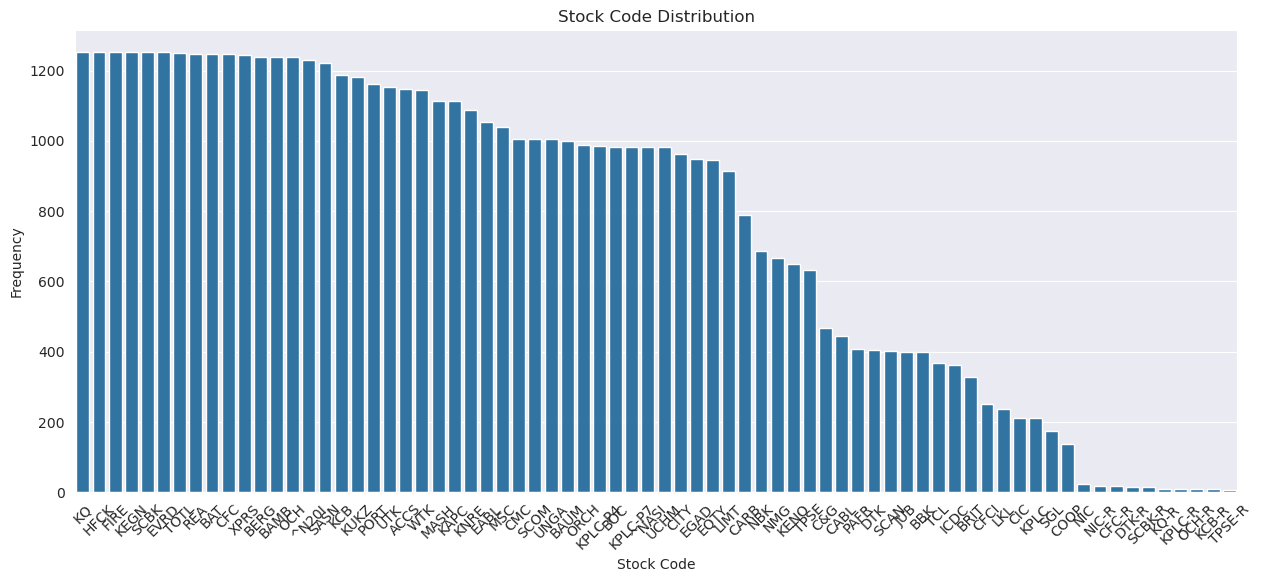

In [17]:
# Class Distribution
stock_counts = stocks_data['CODE'].value_counts()
stock_counts

# # Plot the class distribution
plt.figure(figsize=(15, 6))
sns.barplot(x=stock_counts.index, y=stock_counts.values)
plt.title('Stock Code Distribution')
plt.xlabel('Stock Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


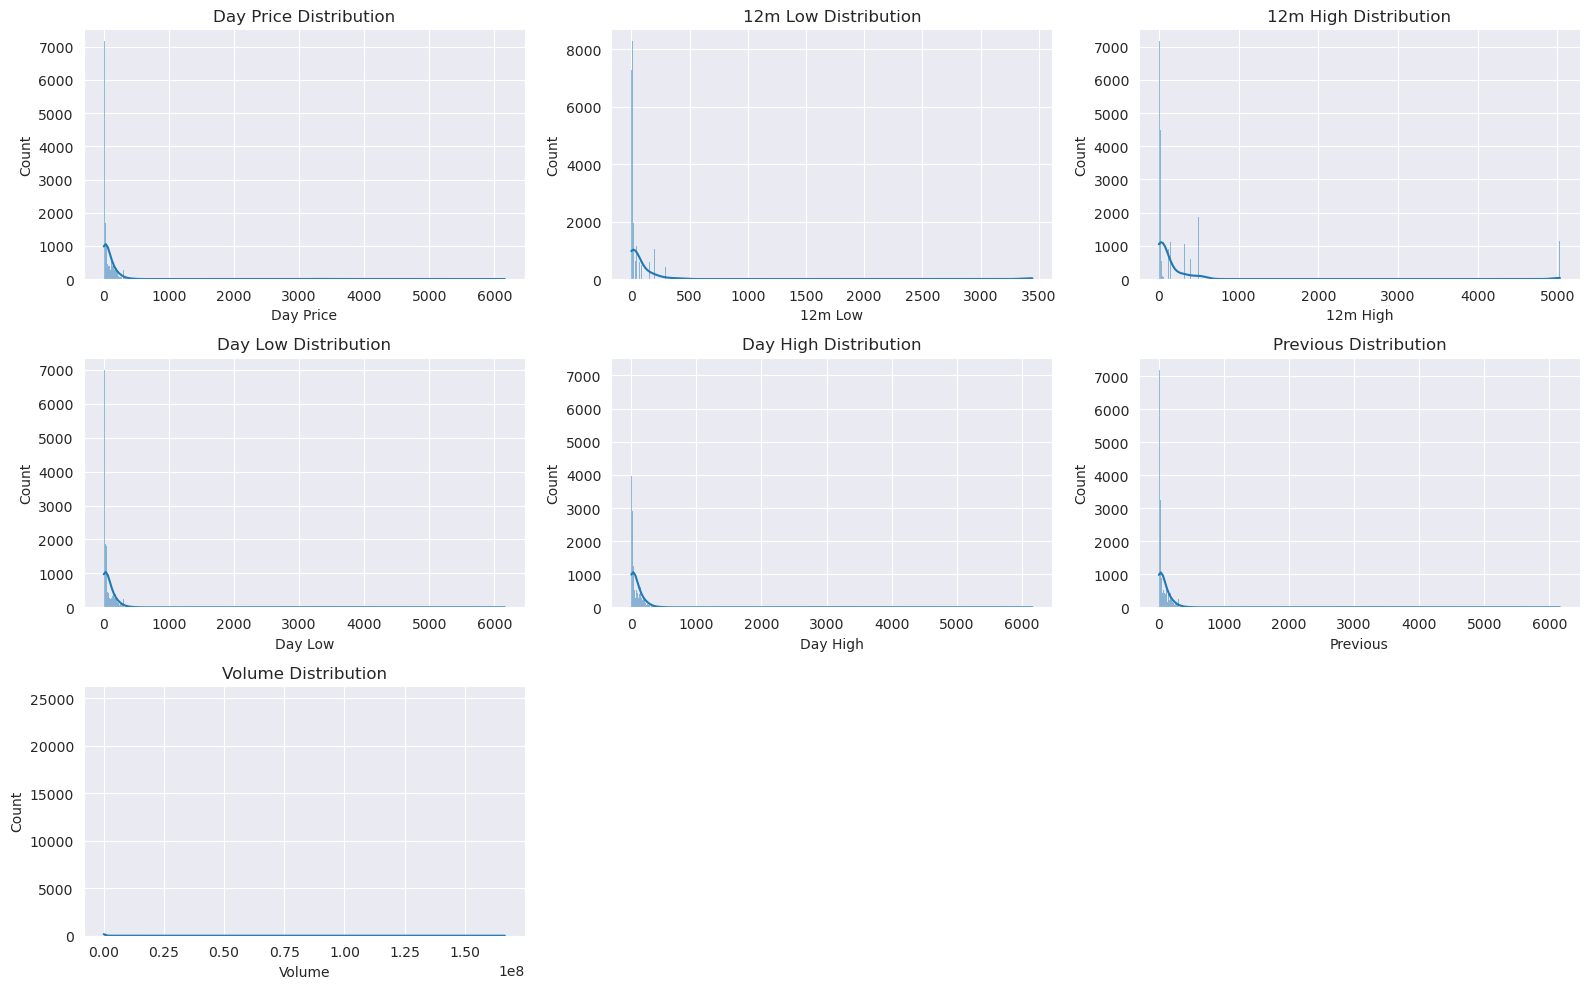

==>> Day Price: Skewness = 6.71, Kurtosis = 45.71
==>> 12m Low: Skewness = 6.19, Kurtosis = 37.36
==>> 12m High: Skewness = 6.11, Kurtosis = 36.63
==>> Day Low: Skewness = 6.71, Kurtosis = 45.72
==>> Day High: Skewness = 6.71, Kurtosis = 45.70
==>> Previous: Skewness = 6.71, Kurtosis = 45.69
==>> Volume: Skewness = 10.08, Kurtosis = 164.76


In [18]:
# Univariate Analysis
from scipy.stats import skew, kurtosis
# Numerical Columns
numerical_columns = ['Day Price', '12m Low', '12m High', 'Day Low','Day High','Previous', 'Volume']
# Plot histograms for numerical columns
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(stocks_data[column], kde=True)
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis for numerical columns
for col in numerical_columns:
    skewness = skew(stocks_data[col].dropna())
    kurt = kurtosis(stocks_data[col].dropna())
    print(f'==>> {col}: Skewness = {skewness:.2f}, Kurtosis = {kurt:.2f}')



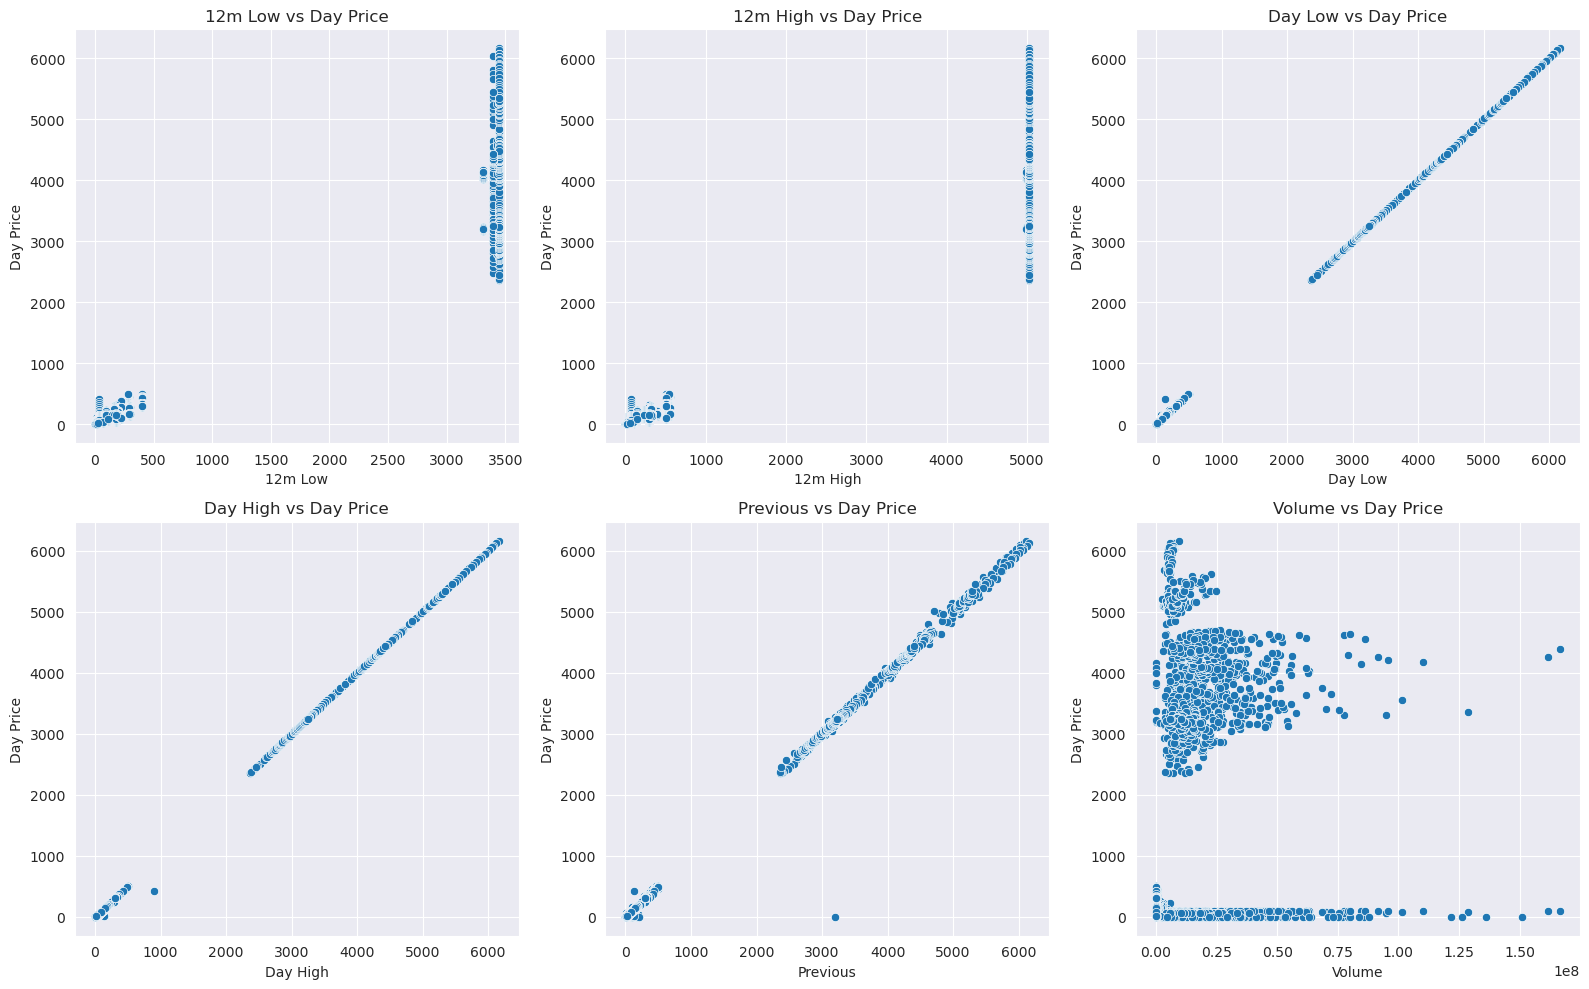

In [19]:
# Bi-variate Analysis
# Scatter plots of Day_Price vs other numerical features
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns[1:], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=column, y='Day Price', data=stocks_data)
    plt.title(f'{column} vs Day Price')
plt.tight_layout()
plt.show()



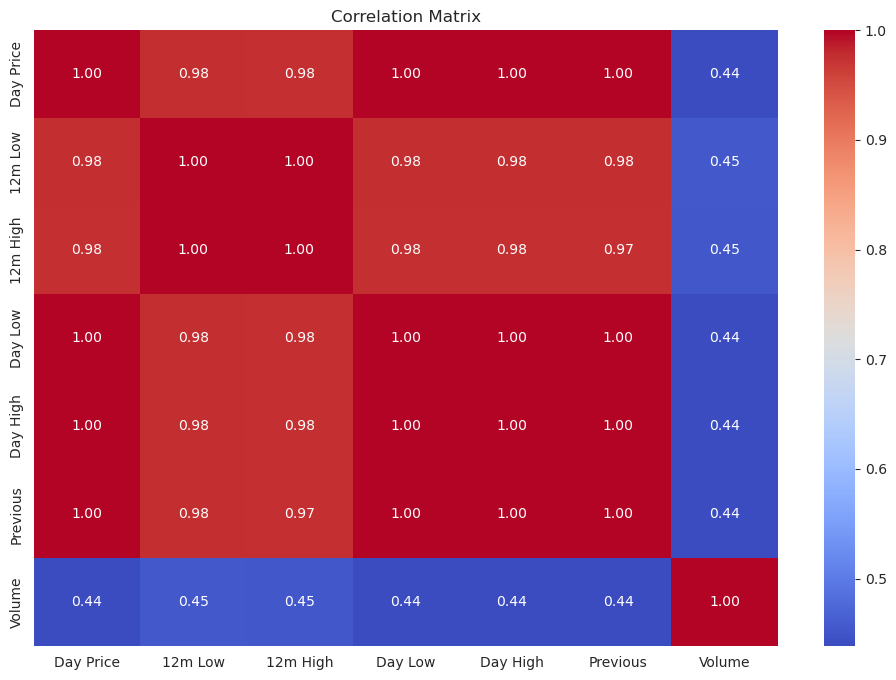

In [20]:
# Correlation matrix (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(stocks_data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

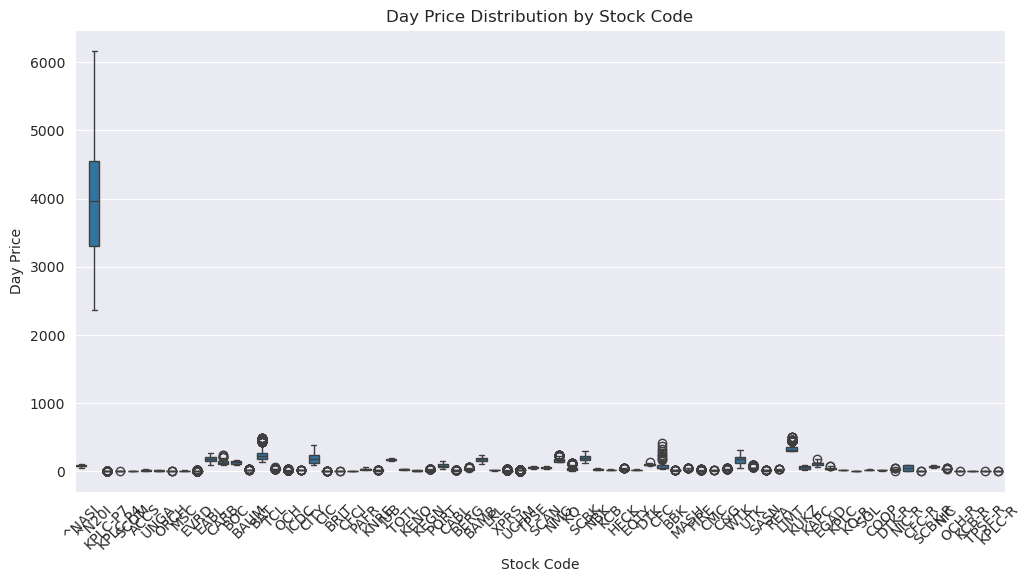

In [21]:
# Box-plots of Day_Price grouped by Code
plt.figure(figsize=(12, 6))
sns.boxplot(x='CODE', y='Day Price', data=stocks_data)
plt.title('Day Price Distribution by Stock Code')
plt.xlabel('Stock Code')
plt.ylabel('Day Price')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering for Stock Prediction

## Goal
To define the features and target variable for predicting stock performance using our dataset.

---

## Prediction Target (Dependent Variable)
### Chosen Target:
**Day_Price**: Predict the stock's closing price for the day.

---

## Features (Independent Variables)
We select features that are likely to influence the Day_Price directly or indirectly.

### Direct Predictors:
1. **12m_Low**: The 12-month lowest price (helps identify trends).
2. **12m_High**: The 12-month highest price (helps identify trends).
3. **Day_Low**: The day’s lowest price (correlates directly with closing prices).
4. **Day_High**: The day’s highest price.
5. **Previous**: The previous day's price (provides continuity in trends).
6. **Volume**: The number of trades (proxy for market activity).

### Excluded Predictors:
1. **Code** and **Name**: Relevant for stock identification but irrelevant for numerical prediction.
2. **Change** and **Change%**: Derivable from Day_Price and Previous.

---

## Finalized Features
**Target:** `Day_Price`

**Selected Features:**
- 12m_Low
- 12m_High
- Day_Low
- Day_High
- Previous
- Volume

---

### Simplicity Justification
For simplicity and alignment with the project’s scope, advanced engineered features like Price Range, Volatility Ratios, and Momentum Indicators are excluded. The current selection balances informativeness and computational efficiency.

---

**Next Steps:** Proceed to model training and evaluation based on this feature setup.



In [22]:
# Selected Features and Target Variable
selected_features = ['12m Low', '12m High', 'Day Low', 'Day High', 'Previous', 'Volume']
target_variable = 'Day Price'


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [24]:
# We will use expanding window cross-validation to train and evaluate the model
# Define expanding window cross-validation function

def expanding_window_cv(stocks, features, target, model, initial_train_size, test_size, step_size):
    """
    Perform expanding window cross-validation and compute multiple regression metrics.

    Parameters:
        stocks (DataFrame): The dataset containing features and target.
        features (list): List of feature column names.
        target (str): Target column name.
        model: The regression model to use.
        initial_train_size (int): Number of initial rows for training.
        test_size (int): Number of rows for each test set.
        step_size (int): Increment for expanding the training set.

    Returns:
        dict: Dictionary with lists of metrics for each fold.
    """
    n_samples= stocks.shape[0]
    indices = np.arange(n_samples)
    print(f"======= Total samples: {n_samples}, Type: {type(n_samples)}")

    _metrics = {
        "MAE": [],
        "MSE": [],
        "RMSE": [],
        "R2": []
    }

    for start in range(0, n_samples - initial_train_size - test_size, step_size):
        train_start = start
        train_end = train_start + initial_train_size
        test_start = train_end
        test_end = test_start + test_size

        # Split train and test sets
        train_indices = indices[train_start:train_end]
        test_indices = indices[test_start:test_end]

        X_train = stocks_data.iloc[train_indices][features]
        y_train = stocks_data.iloc[train_indices][target]
        X_test = stocks_data.iloc[test_indices][features]
        y_test = stocks_data.iloc[test_indices][target]

        # Train the model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Compute metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store metrics
        _metrics["MAE"].append(mae)
        _metrics["MSE"].append(mse)
        _metrics["RMSE"].append(rmse)
        _metrics["R2"].append(r2)

        print(f"Fold {len(_metrics['MAE'])}: Train {train_start}-{train_end}, Test {test_start}-{test_end}, "
              f"MAE: {mae:}, MSE: {mse:}, RMSE: {rmse:}, R2: {r2:}")

    return _metrics


In [25]:
# Initialize the regression models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Define parameters for expanding window cross-validation
init_train_size=1000  # Use first 1000 rows for initial training
test_s=200           # Test on 200 rows in each fold
step_s=200             # Expand training set by 200 rows per fold

In [26]:
# Perform expanding window cross-validation for each model
results = {}

for model_name, m in models.items():
    print(f"\nTraining and evaluating {model_name}...")
    results[model_name] = expanding_window_cv(
        stocks=stocks_data,
        features=selected_features,
        target=target_variable,
        model=m,
        initial_train_size=init_train_size,
        test_size=test_s,
        step_size=step_s
    )




Training and evaluating Random Forest...
======= Total samples: 54733, Type: <class 'int'>
Fold 1: Train 0-1000, Test 1000-1200, MAE: 0.5175025000000513, MSE: 1.98680824025057, RMSE: 1.409541854735279, R2: 0.9999901058801186
Fold 2: Train 200-1200, Test 1200-1400, MAE: 0.26348699999999065, MSE: 0.3606342282000625, RMSE: 0.6005282909239685, R2: 0.999997630219815
Fold 3: Train 400-1400, Test 1400-1600, MAE: 0.7894700000000577, MSE: 13.80689995750123, RMSE: 3.715763711204095, R2: 0.9999294274290466
Fold 4: Train 600-1600, Test 1600-1800, MAE: 0.775013999999957, MSE: 9.08866331369928, RMSE: 3.0147410027561703, R2: 0.9999386309858669
Fold 5: Train 800-1800, Test 1800-2000, MAE: 0.43735149999999234, MSE: 3.9913045735498622, RMSE: 1.997824960688464, R2: 0.999973165043897
Fold 6: Train 1000-2000, Test 2000-2200, MAE: 0.5459614999999597, MSE: 2.992209742549396, RMSE: 1.7298004921231223, R2: 0.9999850041258483
Fold 7: Train 1200-2200, Test 2200-2400, MAE: 1.3513094999999316, MSE: 47.44441229464

In [27]:
# Display the results for each model
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric_name, values in metrics.items():
        avg_value = np.mean(values)
        print(f"{metric_name}: {avg_value:.4f}")


Random Forest Results:
MAE: 1.8348
MSE: 1154.3653
RMSE: 10.0664
R2: 0.9984

Gradient Boosting Results:
MAE: 1.7799
MSE: 1073.5400
RMSE: 8.5304
R2: 0.9986

XGBoost Results:
MAE: 2.6692
MSE: 2747.0799
RMSE: 15.4765
R2: 0.9940


### **Hyperparameter Tuning**

In this section, we focus on optimizing the performance of our regression models using **hyperparameter tuning**. By systematically searching through a predefined space of hyperparameter combinations, we aim to identify the best settings for each model.

#### **Key Steps:**
1. **Define Hyperparameter Grids:**
   Specify the potential values for critical hyperparameters for each model:
   - **Random Forest**: Number of trees, depth, feature splits, etc.
   - **Gradient Boosting**: Learning rate, number of estimators, and subsampling.
   - **XGBoost**: Learning rate, depth, and column sampling strategies.

2. **Use Randomized Search Cross-Validation:**
   Leverage `RandomizedSearchCV` to:
   - Efficiently explore the parameter grid.
   - Optimize for the lowest **Mean Absolute Error (MAE)**.
   - Validate performance using **3-fold cross-validation**.

3. **Store Best Models:**
   Save the best hyperparameter configurations for each model for use in subsequent stages of the workflow.


In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
# Hyperparameter grids
param_grids = {
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "max_features": ['sqrt', 'log2']
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "subsample": [0.8, 1.0]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
        "min_child_weight": [1, 3],
        "colsample_bytree": [0.8, 1.0],
        "subsample": [0.8, 1.0]
    }
}


In [30]:
# Randomized search cross-validation

best_models = {}

for model_name, model in models.items():

    print(f"\nHyperparameter tuning for {model_name}...")
    param_grid = param_grids[model_name]

    # Randomized search with 3-fold cross-validation
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=50,  # Number of parameter settings sampled
        cv=3,       # 3-fold cross-validation
        scoring="neg_mean_absolute_error",  # Optimize for MAE
        n_jobs=-1,  # Use all cores
        random_state=42
    )

    # Perform tuning
    random_search.fit(stocks_data[selected_features], stocks_data[target_variable])

    # Store best model
    best_models[model_name] = random_search.best_estimator_

    print(f"Best Parameters for {model_name}: {random_search.best_params_}")
    print(f"Best Score for {model_name}: {-random_search.best_score_}")


Hyperparameter tuning for Random Forest...


/home/gitongah/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best Score for Random Forest: 4.749314864623376

Hyperparameter tuning for Gradient Boosting...
Best Parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'learning_rate': 0.1}
Best Score for Gradient Boosting: 3.976971267050557

Hyperparameter tuning for XGBoost...
Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score for XGBoost: 11.290260616752809


In [31]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from typing import Dict, List, Tuple
import pandas as pd
from sklearn.base import BaseEstimator
import warnings

def expanding_window_cv_with_tuned_models(
        stocks: pd.DataFrame,
        features: List[str],
        target: str,
        models: Dict[str, BaseEstimator],
        initial_train_size: int,
        test_size: int,
        step_size: int,
        custom_metrics: Dict[str, callable] = None
) -> Tuple[Dict, Dict, Dict]:
    """
    Perform expanding window cross-validation using tuned models and compute metrics.

    Parameters:
        stocks (pd.DataFrame): The dataset containing features and target
        features (List[str]): List of feature column names
        target (str): Target column name
        models (Dict[str, BaseEstimator]): Dictionary of tuned models
        initial_train_size (int): Number of initial rows for training
        test_size (int): Number of rows for each test set
        step_size (int): Increment for expanding the training set
        custom_metrics (Dict[str, callable], optional): Dictionary of custom metric functions

    Returns:
        Tuple[Dict, Dict, Dict]: Tuple containing:
            - metrics_results: Dictionary with metrics for each model
            - residuals: Dictionary with residuals for each model
            - predictions: Dictionary with predictions for each model
    """
    # Input validation
    if initial_train_size <= 0 or test_size <= 0 or step_size <= 0:
        raise ValueError("initial_train_size, test_size, and step_size must be positive")

    if not set(features).issubset(stocks.columns):
        missing_features = set(features) - set(stocks.columns)
        raise ValueError(f"Features not found in dataset: {missing_features}")

    if target not in stocks.columns:
        raise ValueError(f"Target column '{target}' not found in dataset")

    n_samples = len(stocks)
    if n_samples < initial_train_size + test_size:
        raise ValueError("Not enough samples for the specified window sizes")

    # Initialize results containers
    metrics_results = {model_name: {"MAE": [], "MSE": [], "RMSE": [], "R2": []}
                       for model_name in models}
    residuals = {model_name: [] for model_name in models}
    predictions = {model_name: [] for model_name in models}

    # Add custom metrics to results container if provided
    if custom_metrics:
        for model_name in models:
            for metric_name in custom_metrics:
                metrics_results[model_name][metric_name] = []

    # Calculate total iterations for progress tracking
    total_iterations = (n_samples - initial_train_size - test_size) // step_size + 1
    current_iteration = 0
    print(f"Total Iterations: {total_iterations}")
    for start in range(0, n_samples - initial_train_size - test_size + 1, step_size):

        current_iteration += 1

        # Calculate window indices
        train_end = start + initial_train_size
        test_end = train_end + test_size

        # Split data
        X_train = stocks.iloc[start:train_end][features]
        y_train = stocks.iloc[start:train_end][target]
        X_test = stocks.iloc[train_end:test_end][features]
        y_test = stocks.iloc[train_end:test_end][target]

        # Store window information for debugging
        window_info = {
            'train_start': start,
            'train_end': train_end,
            'test_start': train_end,
            'test_end': test_end,
            'train_size': len(X_train),
            'test_size': len(X_test)
        }
        # print(f"Fold ")
        for model_name, model in models.items():
            try:
                # Train and predict
                with warnings.catch_warnings():
                    warnings.filterwarnings('ignore')  # Suppress convergence warnings
                    model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                # Store predictions and residuals
                predictions[model_name].extend(list(zip(y_test.index, y_pred)))
                residuals[model_name].extend(y_test - y_pred)

                # Calculate standard metrics
                metrics = {
                    "MAE": mean_absolute_error(y_test, y_pred),
                    "MSE": mean_squared_error(y_test, y_pred),
                    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
                    "R2": r2_score(y_test, y_pred)
                }

                # Calculate custom metrics if provided
                if custom_metrics:
                    for metric_name, metric_func in custom_metrics.items():
                        try:
                            metric_value = metric_func(y_test, y_pred)
                            metrics[metric_name] = metric_value
                        except Exception as e:
                            print(f"Error calculating {metric_name} for {model_name}: {str(e)}")
                            metrics[metric_name] = None

                # Store metrics
                for metric_name, value in metrics.items():
                    metrics_results[model_name][metric_name].append(value)

            except Exception as e:
                print(f"Error in iteration {current_iteration}/{total_iterations} "
                      f"for model {model_name}: {str(e)}")
                print(f"Window info: {window_info}")
                continue

    return metrics_results, residuals, predictions

In [32]:
# Define parameters for expanding window CV
init_train_size = 1000  # Initial training size
test_size = 200         # Test set size
step_size = 200         # Step size for expanding window

# Perform cross-validation
metrics_results, residuals, predictions = expanding_window_cv_with_tuned_models(
    stocks=stocks_data,
    features=selected_features,
    target=target_variable,
    models=best_models,
    initial_train_size=init_train_size,
    test_size=test_size,
    step_size=step_size
)

### Model Evaluation and Comparison (Visualizations)

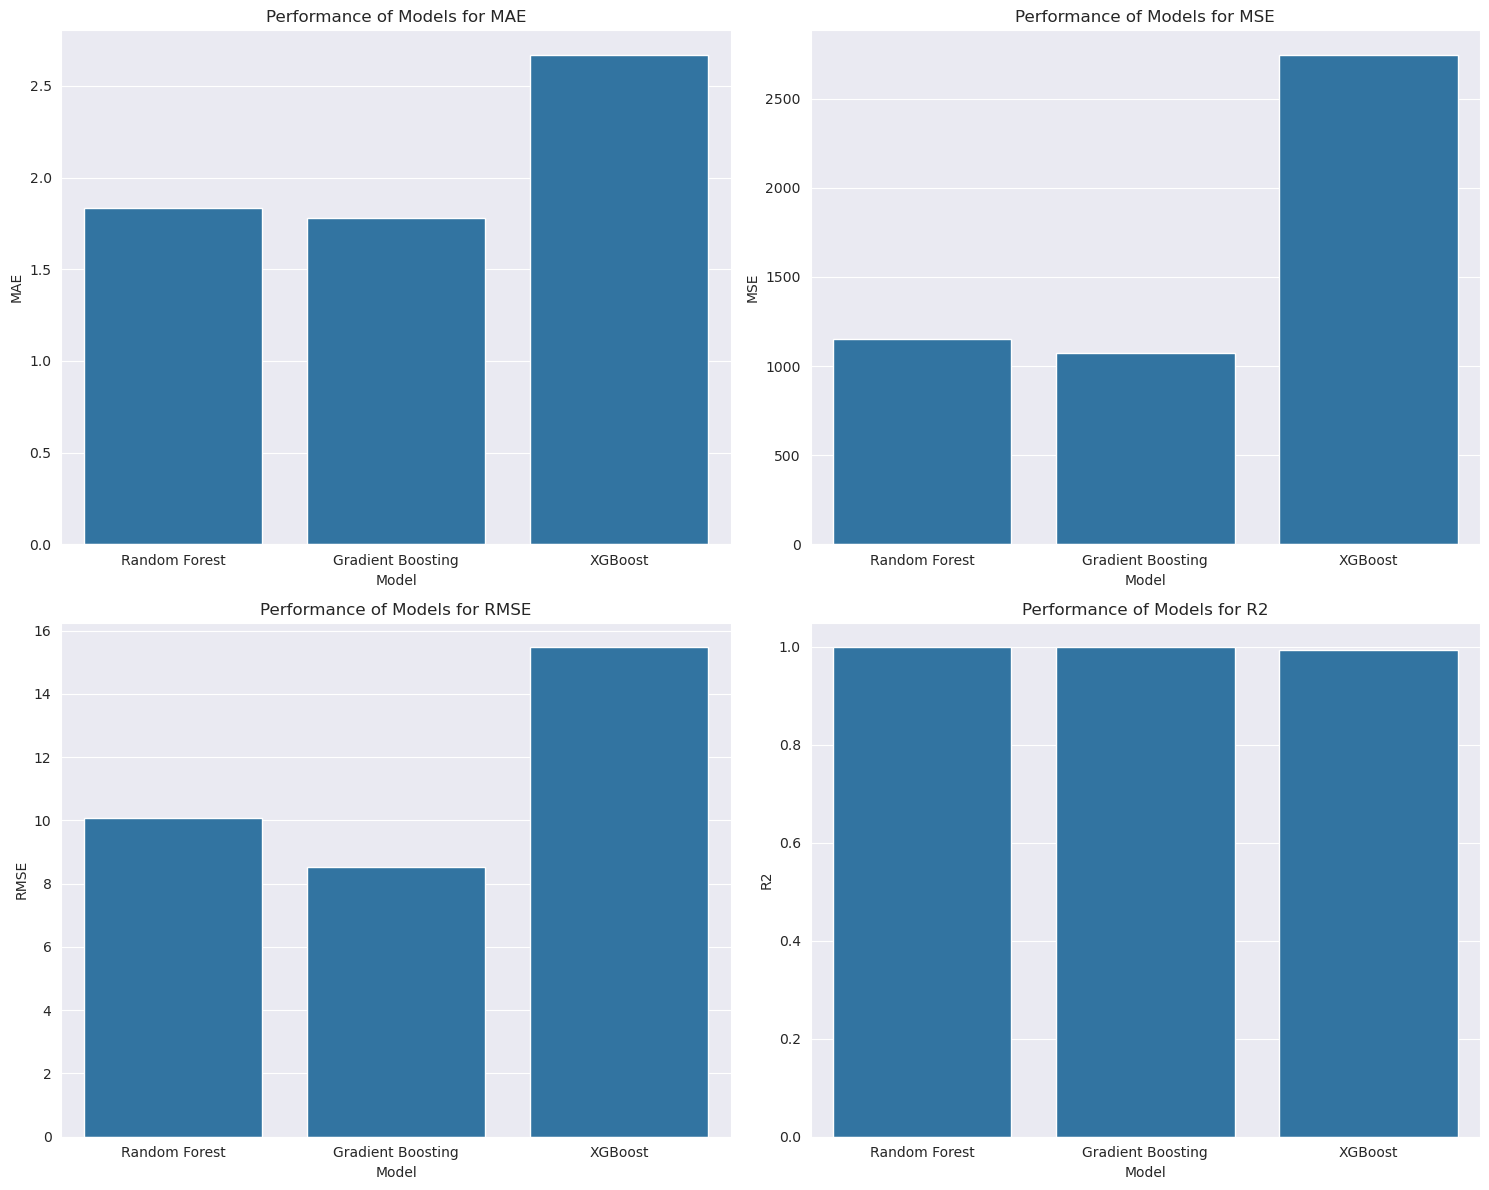

In [33]:
# Calculate average metrics for each model
average_metrics = {model_name: {metric_name: np.mean(values)
                                for metric_name, values in metrics.items()}
                   for model_name, metrics in results.items()}

# Convert to a DataFrame for easier plotting
average_metrics_df = pd.DataFrame(average_metrics)

# Plot each metric
metrics_to_plot = average_metrics_df.index.tolist()

# Number of metrics to plot
num_metrics = len(metrics_to_plot)

# Calculate the number of rows needed
num_rows = (num_metrics + 1) // 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each metric in a separate subplot
for i, metric in enumerate(metrics_to_plot):
    sns.barplot(ax=axes[i], x=average_metrics_df.columns, y=average_metrics_df.loc[metric])
    axes[i].set_title(f'Performance of Models for {metric}')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [34]:
# Identify the best model per metric
best_models_per_metric = {}

for metric in average_metrics_df.index:
    if metric == "R2":
        best_models_per_metric[metric] = average_metrics_df.loc[metric].idxmax()
    else:
        best_models_per_metric[metric] = average_metrics_df.loc[metric].idxmin()

print("\nBest Models for Each Metric:")
for metric, model in best_models_per_metric.items():
    print(f"{metric}: {model}")


Best Models for Each Metric:
MAE: Gradient Boosting
MSE: Gradient Boosting
RMSE: Gradient Boosting
R2: Gradient Boosting


In [35]:
average_metrics_df

,Random Forest,Gradient Boosting,XGBoost
MAE,1.834820,1.779933,2.669232
MSE,1154.365279,1073.540013,2747.079932
RMSE,10.066420,8.530404,15.476546
R2,0.998420,0.998561,0.994004


In [38]:
from scipy import stats
import seaborn as sns
from typing import Dict, List
import pandas as pd

def plot_residual_analysis(
        residuals: Dict[str, List[float]],
        predictions: Dict[str, List[tuple]],
        figsize: tuple = (20, 12),
        model_colors: Dict[str, str] = None
) -> None:
    """
    Create comprehensive residual analysis plots for each model.

    Parameters:
        residuals (Dict[str, List[float]]): Dictionary of residuals for each model
        predictions (Dict[str, List[tuple]]): Dictionary of (index, prediction) tuples for each model
        figsize (tuple): Figure size for the entire plot
        model_colors (Dict[str, str]): Dictionary mapping model names to colors
    """
    if model_colors is None:
        # Default colors for different models
        default_colors = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f', '#9b59b6']
        model_colors = {model: color for model, color in
                        zip(residuals.keys(), default_colors[:len(residuals)])}

    for model_name, model_residuals in residuals.items():
        # Create figure with subplots
        fig = plt.figure(figsize=figsize)
        fig.suptitle(f'Residual Analysis - {model_name}', fontsize=16, y=1.02)

        # Convert predictions to array for plotting
        pred_indices, pred_values = zip(*predictions[model_name])
        pred_values = np.array(pred_values)
        model_residuals = np.array(model_residuals)

        # 1. Residuals vs Predicted Values
        ax1 = plt.subplot(2, 3, 1)
        ax1.scatter(pred_values, model_residuals,
                    alpha=0.5, color=model_colors[model_name])
        ax1.axhline(y=0, color='r', linestyle='--', alpha=0.3)
        ax1.set_xlabel('Predicted Values')
        ax1.set_ylabel('Residuals')
        ax1.set_title('Residuals vs Predicted Values')

        # Add trend line
        z = np.polyfit(pred_values, model_residuals, 1)
        p = np.poly1d(z)
        ax1.plot(pred_values, p(pred_values),
                 color='red', alpha=0.3, linestyle='--')

        # 2. Residuals Time Series Plot
        ax2 = plt.subplot(2, 3, 2)
        ax2.plot(pred_indices, model_residuals,
                 color=model_colors[model_name], alpha=0.7)
        ax2.axhline(y=0, color='r', linestyle='--', alpha=0.3)
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Residuals')
        ax2.set_title('Residuals Over Time')

        # 3. Histogram of Residuals
        ax3 = plt.subplot(2, 3, 3)
        sns.histplot(model_residuals, kde=True, color=model_colors[model_name],
                     alpha=0.5, ax=ax3)
        ax3.axvline(x=0, color='r', linestyle='--', alpha=0.3)
        ax3.set_xlabel('Residuals')
        ax3.set_ylabel('Frequency')
        ax3.set_title('Distribution of Residuals')


        # Adjust layout
        plt.tight_layout()
        plt.show()

        # Print summary statistics
        print(f"\nSummary Statistics for {model_name}:")
        print(f"Mean of residuals: {np.mean(model_residuals):.4f}")
        print(f"Standard deviation of residuals: {np.std(model_residuals):.4f}")
        print(f"Skewness: {stats.skew(model_residuals):.4f}")
        print(f"Kurtosis: {stats.kurtosis(model_residuals):.4f}")

        # Perform Shapiro-Wilk test for normality
        statistic, p_value = stats.shapiro(model_residuals)
        print(f"\nShapiro-Wilk test for normality:")
        print(f"Statistic: {statistic:.4f}")
        print(f"P-value: {p_value:.4f}")

In [ ]:
plot_residual_analysis(residuals, predictions)